In [ ]:
#default_exp data

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2

In [ ]:
#hide 
import os 
os.chdir('/home/frank/Work/Projecten/DoRe/data/maxrf/crono')

# Download demo data 

> Getting started 

Because we like to study historic inks in our lab, my colleague Birgit Reissland prepared an artificially aged *blind test* sample with inks on paper. A detail (see image below) with iron-gall ink was scanned with the Crono MA-XRF instrument and saved with the awkward file name starting with the hour time stamp 14:20:02 by the Crono software: 

    '14200215102021-blindTest2AgedDetail.HDF5' (50.6Mb).

In this tutorial we will explore and process the contents of this Crono HDF5 file. 

In [ ]:
#hide 
%matplotlib notebook

<IPython.core.display.Javascript object>


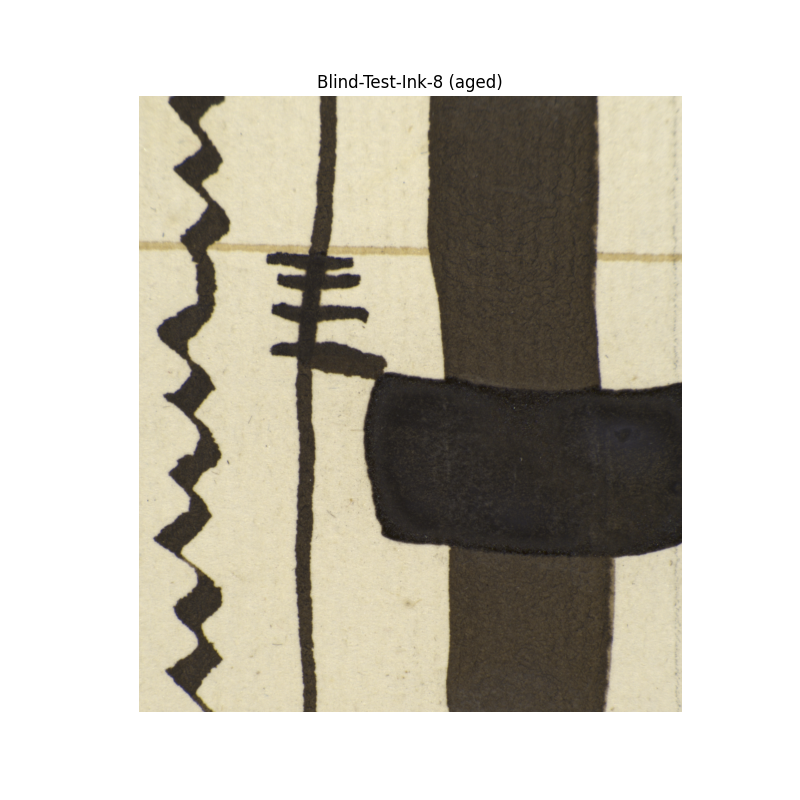

In [ ]:
#hide_input 

import matplotlib.pyplot as plt

img_vis = plt.imread('Ink-08-aged-VIS.png')[100:1200, 50:1300] # roughly the scanning area
img_vis = img_vis.transpose([1, 0, 2])[:,::-1] # rotate 90 deg clockwise 

h, w, _ = img_vis.shape

fig, ax = plt.subplots(figsize=[8, 8])
#ax.imshow(FeKa_map, extent=[0, w, h, 0], origin='lower')
ax.imshow(img_vis)
ax.set_title('Blind-Test-Ink-8 (aged)')
ax.axis('off');

If you want to try using the `cronomaxrf` package, you can download this small demo dataset from my [Backblaze](https://www.backblaze.com/) cloud storage by running the code below. Alternatively, you can manually download the HDF5 and image file by clicking on the links here: [Crono HDF5](https://f002.backblazeb2.com/file/crono-maxrf-data-demo/14200215102021-blindTest2AgedDetail.HDF5) and [png image](https://f002.backblazeb2.com/file/crono-maxrf-data-demo/Ink-08-aged-VIS.png).

In [ ]:
from cronomaxrf import download 

download()

Backblaze cloud storage bucket crono-maxrf-data-demo contains the following files: 
(1) 14200215102021-blindTest2AgedDetail.2022214166.Exported.HDF5 (2.7Mb)
(2) 14200215102021-blindTest2AgedDetail.HDF5 (50.6Mb)
(3) 14200215102021-blindTest2AgedDetail_FeKa.png (1.2Mb)
(4) Ink-08-aged-VIS.png (4.5Mb)

Please wait while downloading all files from bucket into your current working directory...
Ready!


*Also included in the demo dataset are (1) **another type of HDF5 file** as exported by the Crono software, (3) an iron map as computed by the Crono software, and (4) a photo of the scan area.* 

# API 

In [ ]:
#export 

import b2sdk.v2 as b2

def download(): 
    '''Download all datafiles to try the demo. '''
    
    # Backblaze cloud storage credentials          
    bucket_name='crono-maxrf-data-demo' 
    application_key_id='002c0259a1c18960000000005'  
    application_key='K0021ZxgvJXexIPG6cpTRHOBOQ64ceo'

    # open connection to bucket 
    info = b2.InMemoryAccountInfo()
    b2_api = b2.B2Api(info) 
    b2_api.authorize_account('production',  application_key_id, application_key)

    # get bucket info 
    bucket = b2_api.get_bucket_by_name(bucket_name)
    bucket_dict_list = [f[0].as_dict() for f in bucket.ls()]
    bucket_filenames = [d['fileName'] for d in bucket_dict_list]
    bucket_filesizes = [d['size'] for d in bucket_dict_list]

    print(f'Backblaze cloud storage bucket {bucket_name} contains the following files: ')    
    for i, [fname, fsize] in enumerate(zip(bucket_filenames, bucket_filesizes)): 
        print(f'({i+1}) {fname} ({fsize / 1e6:0.1f}Mb)')

    print('\nPlease wait while downloading all files from bucket into your current working directory...')

    for i, fname in enumerate(bucket_filenames): 
        fh = bucket.download_file_by_name(fname)
        fh.save_to(fname) 
    print('Ready!')